In [80]:
import xarray as xr
import numpy as np
import glob 
import matplotlib.pyplot as plt


In [81]:
datadir = "/home/jovyan/student-storages/GROUP5/Oscar/Data/Aerosol_Brookes_2020"
datafiles = glob.glob(datadir + '/*.nc')


In [83]:
# loading the files without the lat and lon values
datasets = [xr.open_dataset(f).drop_vars(['latitude', 'longitude']) for f in datafiles]

In [16]:
# concatenating the files data into one dataset
ds = xr.concat(datasets, dim="time").sortby('time')
ds.var

<bound method DatasetAggregations.var of <xarray.Dataset> Size: 161MB
Dimensions:                                         (time: 90628, index: 100)
Coordinates:
  * time                                            (time) datetime64[ns] 725kB ...
Dimensions without coordinates: index
Data variables: (12/22)
    day_of_year                                     (time) float32 363kB 213....
    year                                            (time) int32 363kB 2018 ....
    month                                           (time) int32 363kB 8 8 ... 9
    day                                             (time) int32 363kB 1 1 ... 6
    hour                                            (time) int32 363kB 0 ... 23
    minute                                          (time) int32 363kB 0 ... 59
    ...                                              ...
    number_concentration_of_ambient_aerosol_in_air  (time) float32 363kB 0.0 ...
    qc_flag                                         (time, index) int8 

In [36]:
# Loading the number concentration variable
Naer = ds.number_concentration_of_ambient_aerosol_in_air

In [85]:
# Construct the datetime series
import datetime
dates = []
for i in range(0, len(Naer)):
    dates.append(datetime.datetime(int(ds.year[i]), int(ds.month[i]), int(ds.day[i]), int(ds.hour[i]), int(ds.minute[i])))
dates = np.asarray(dates)
dates

array([datetime.datetime(2018, 8, 1, 0, 0),
       datetime.datetime(2018, 8, 1, 0, 0),
       datetime.datetime(2018, 8, 1, 0, 1), ...,
       datetime.datetime(2018, 9, 6, 23, 58),
       datetime.datetime(2018, 9, 6, 23, 59),
       datetime.datetime(2018, 9, 6, 23, 59)], dtype=object)

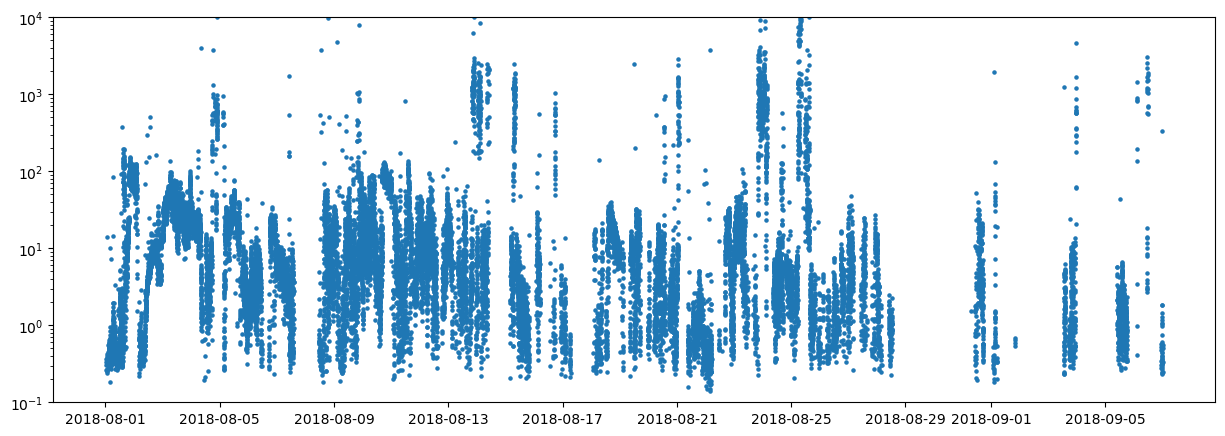

In [103]:
not0_idx = np.where(Naer > 0)   # getting rid of the 0 values
# plotting the data
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_ylim(1e-1, 1e4)
ax.scatter(dates[not0_idx], Naer[not0_idx], 5)


In [104]:
# resampling
Naer.resample(time = '3min')

<DataArrayResample, grouped over 1 grouper(s), 17760 groups in total:
    '__resample_dim__': 15126/17760 groups present with labels 2018-08-01, ..., 2018-09-06T2...>